# Creating figure 6
This notebook generates figure 6 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape.

In [1]:
import sys

import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)
import scipy.io

In [4]:
a = AnalysisTools('data/knp_column_neuron.h5')
cell_morphology = scipy.io.loadmat('data/cell_morphology_with_points.mat')
neuron_data = h5py.File('data/neuron_input_1.h5','r')

In [5]:
xmin = a.mesh.coordinates()[:,0].min()
xmax = a.mesh.coordinates()[:,0].max()
xlen = xmax - xmin

ymin = a.mesh.coordinates()[:,1].min()
ymax = a.mesh.coordinates()[:,1].max()
ylen = ymax - ymin

zmin = a.mesh.coordinates()[:,2].min()
zmax = a.mesh.coordinates()[:,2].max()
zmid = (zmax + zmin)/2

N = 100
padding = 0.01


In [6]:
x_array = np.linspace(xmin + padding*xlen, xmax - padding*xlen, N)
y_array = np.linspace(ymin + padding*ylen, ymax - padding*ylen, N)
X,Y = np.meshgrid (x_array,y_array)

X=X*1e6
Y = Y*1e6

measurement_point = [20,20,20]

In [11]:
def plot_func_with_neuron(t_idx, ion_idx, levels, c_init, title='', cmap='RdBu', clabel='', factor=1.):
    Z = np.zeros([100, 100])

    k = t_idx
    u = Function(a.W)
    c = Function(a.V)
    a.hdf.read(u, '/solution/vector_'+str(k))
    c.assign(project(u.sub(ion_idx), a.V))
    for i,x in enumerate(x_array):
        for j,y in enumerate(y_array):
            p = Point(x,y,zmid)
            Z[j,i] = c(p)
    
    Z = Z*factor
    Z = Z-c_init
    plt.figure(figsize=(2.4,2.4))
    plt.contourf(X,Y,Z, cmap=cmap, levels=levels)
    
    cbar = plt.colorbar(ticks=[-0.8, -0.4, 0, 0.4, 0.8])
        
    xstart = (cell_morphology['xstart'][0])*1e6
    xend = (cell_morphology['xend'][0])*1e6

    ystart = (cell_morphology['ystart'][0])*1e6
    yend = (cell_morphology['yend'][0])*1e6

    NN = cell_morphology['N'][0][0]

    [plt.plot([xstart[idx], xend[idx]], [ystart[idx], yend[idx]], c='k', linewidth=0.4, zorder=1) for idx in range(NN)]  
    plt.axis("image")
    plt.title(title)
    plt.scatter([measurement_point[0]], [measurement_point[1]], 25, c='lightgreen', edgecolor='k', zorder=2)

    plt.scatter([-100], [1100], 25, c='magenta', edgecolor='k', zorder=2)
    
    cbar.set_label(clabel)
#     plt.xlabel(r'$x$-position ($\mu$m)')
#     plt.ylabel(r'$y$-position ($\mu$m)')
    plt.xticks([])
    plt.yticks([])
    plt.plot([100, 200], [1100, 1100], 'k')
    plt.text(105, 1000, r'100 \textmu m')
    return Z


/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


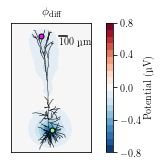

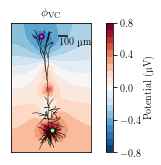

In [12]:
t_idx = 800

title_phi_diff = r'$\phi_{\mathrm{diff}}$'
c_init = 0
vmin = -0.8
vmax = 0.8
levels = np.linspace(vmin,vmax, 20)
Z_diff = plot_func_with_neuron(t_idx, 4, levels, c_init, title=title_phi_diff, cmap='RdBu_r', clabel=r'Potential (\textmu V)', factor=1e6)
plt.tight_layout()
plt.savefig('phi_diff.pdf')

title_phi_vc = r'$\phi_{\mathrm{VC}}$'
c_init = 0
vmin = -0.8
vmax = 0.8
levels = np.linspace(vmin,vmax, 20)
Z_vc = plot_func_with_neuron(t_idx, 5, levels, c_init, title=title_phi_vc, cmap='RdBu_r', clabel=r'Potential (\textmu V)', factor=1e6)
plt.tight_layout()
plt.savefig('phi_vc.pdf')

plt.show()

/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/andreavs/anaconda3/envs/knpsim/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


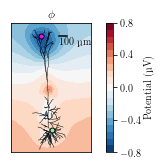

In [14]:
plt.figure(figsize=(2.4,2.4))
vmin = -0.8
vmax = 0.8
levels = np.linspace(vmin,vmax, 20)
plt.contourf(X,Y,Z_vc+Z_diff, cmap='RdBu_r', levels=levels)

cbar = plt.colorbar(ticks=[-0.8, -0.4, 0, 0.4, 0.8])

xstart = (cell_morphology['xstart'][0])*1e6
xend = (cell_morphology['xend'][0])*1e6
ystart = (cell_morphology['ystart'][0])*1e6
yend = (cell_morphology['yend'][0])*1e6
NN = cell_morphology['N'][0][0]

[plt.plot([xstart[idx], xend[idx]], [ystart[idx], yend[idx]], c='k', linewidth=0.4, zorder=1) for idx in range(NN)] 
plt.axis("image")
plt.scatter([measurement_point[0]], [measurement_point[1]], 25, c='lightgreen', edgecolor='k', zorder=2)

plt.scatter([-100], [1100], 25, c='magenta', edgecolor='k', zorder=2)
plt.title(r'$\phi$')
cbar.set_label(r'Potential (\textmu V)')

plt.xticks([])
plt.yticks([])
plt.plot([100, 200], [1100, 1100], 'k')
plt.text(105, 1000, r'100 \textmu m')
plt.tight_layout()
plt.savefig('phi.pdf')
plt.show()